In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/paris-2024-olympics-medals/olympics2024.csv


In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#upload the csv file
data=pd.read_csv("/kaggle/input/paris-2024-olympics-medals/olympics2024.csv")
data

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64
...,...,...,...,...,...,...,...
86,84,Peru,PER,0,0,1,1
87,84,Qatar,QAT,0,0,1,1
88,84,Singapore,SIN,0,0,1,1
89,84,Slovakia,SVK,0,0,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          91 non-null     int64 
 1   Country       91 non-null     object
 2   Country Code  91 non-null     object
 3   Gold          91 non-null     int64 
 4   Silver        91 non-null     int64 
 5   Bronze        91 non-null     int64 
 6   Total         91 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 5.1+ KB


In [5]:
data.columns

Index(['Rank', 'Country', 'Country Code', 'Gold', 'Silver', 'Bronze', 'Total'], dtype='object')

In [6]:
data.shape

(91, 7)

In [7]:
#check the null values
data.isna().sum()

Rank            0
Country         0
Country Code    0
Gold            0
Silver          0
Bronze          0
Total           0
dtype: int64

In [8]:
#check the duplicated valuse
data.duplicated().sum()

0

In [9]:
data.describe()

,Rank,Gold,Silver,Bronze,Total
count,91.000000,91.000000,91.000000,91.000000,91.000000
mean,45.307692,3.604396,3.593407,4.219780,11.417582
std,25.652244,6.990278,6.770816,6.558798,19.702829
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,23.500000,0.000000,0.000000,1.000000,2.000000
50%,44.000000,1.000000,1.000000,2.000000,5.000000
75%,68.000000,3.000000,3.000000,5.000000,9.000000
max,84.000000,40.000000,44.000000,42.000000,126.000000


In [10]:
data.head()

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64


In [11]:
data[['Country','Gold']].groupby('Country').sum().sort_values('Gold', ascending=False).head(10)

,Gold
Country,
China,40
United States,40
Japan,20
Australia,18
France,16
Netherlands,15
Great Britain,14
South Korea,13
Germany,12


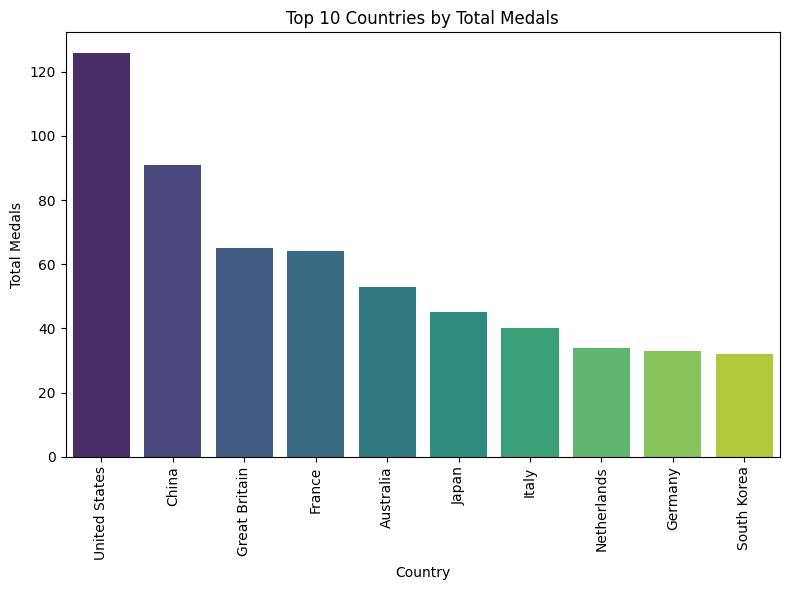

In [12]:
cols = ['Country', 'Total']
df_sorted = data.loc[:, cols].sort_values('Total', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Country', y='Total', data=df_sorted, ax=ax,palette='viridis')
ax.set_title('Top 10 Countries by Total Medals')
ax.set_xlabel('Country')
ax.set_ylabel('Total Medals')
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

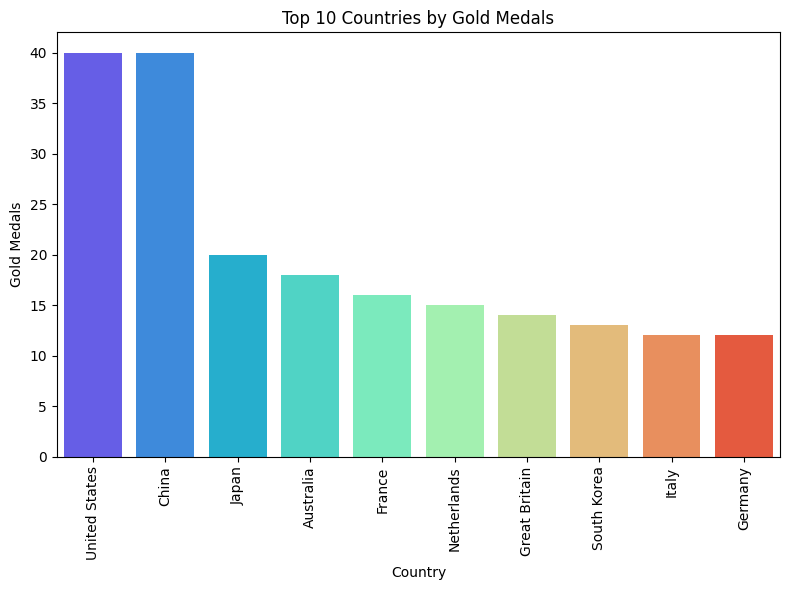

In [13]:
cols = ['Country', 'Gold']
df_sorted = data.loc[:, cols].sort_values('Gold', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Country', y='Gold', data=df_sorted, ax=ax,palette='rainbow')
ax.set_title('Top 10 Countries by Gold Medals')
ax.set_xlabel('Country')
ax.set_ylabel('Gold Medals')
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

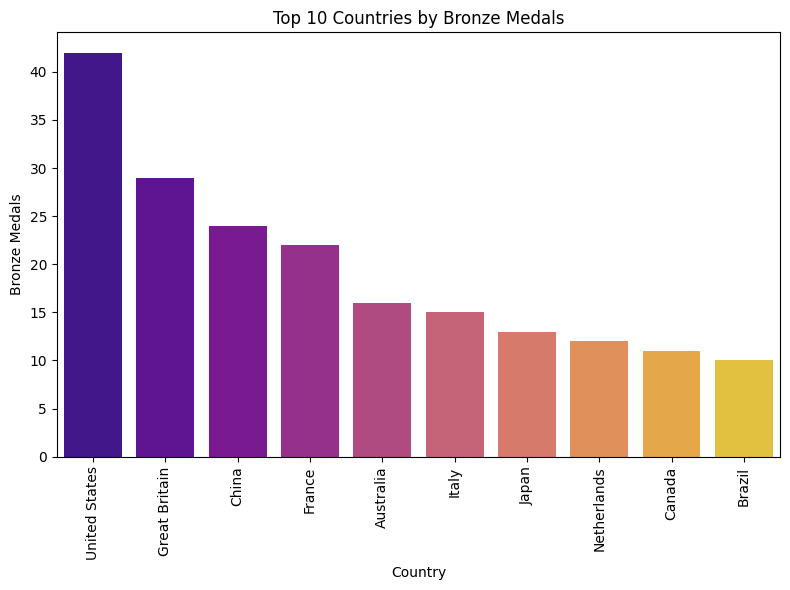

In [14]:
cols = ['Country', 'Bronze']
df_sorted = data.loc[:, cols].sort_values('Bronze', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Country', y='Bronze', data=df_sorted, ax=ax,palette='plasma')
ax.set_title('Top 10 Countries by Bronze Medals')
ax.set_xlabel('Country')
ax.set_ylabel('Bronze Medals')
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

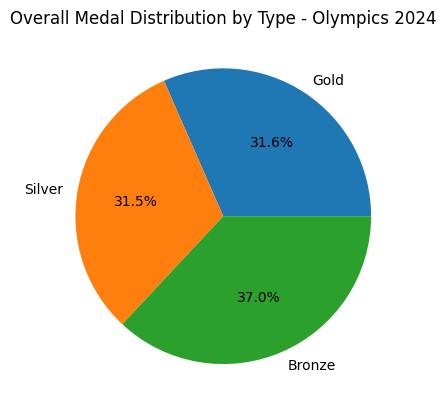

In [15]:
total_gold = data['Gold'].sum()
total_silver = data['Silver'].sum()
total_bronze = data['Bronze'].sum()
medal_counts = [total_gold, total_silver, total_bronze]
labels = ['Gold', 'Silver', 'Bronze']
plt.pie(medal_counts, labels=labels, autopct='%1.1f%%')
plt.title('Overall Medal Distribution by Type - Olympics 2024')
plt.show()

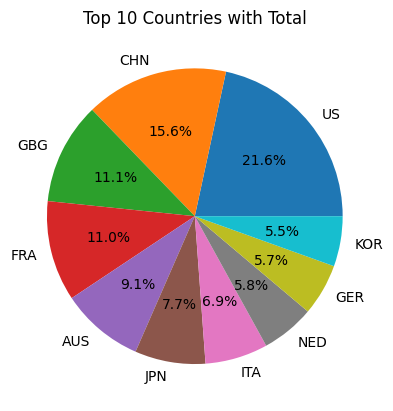

In [16]:
df_total_top10 = data.sort_values('Total', ascending=False).head(10)
plt.pie(df_total_top10['Total'], labels=df_total_top10['Country Code'], autopct='%1.1f%%')
plt.title('Top 10 Countries with Total')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

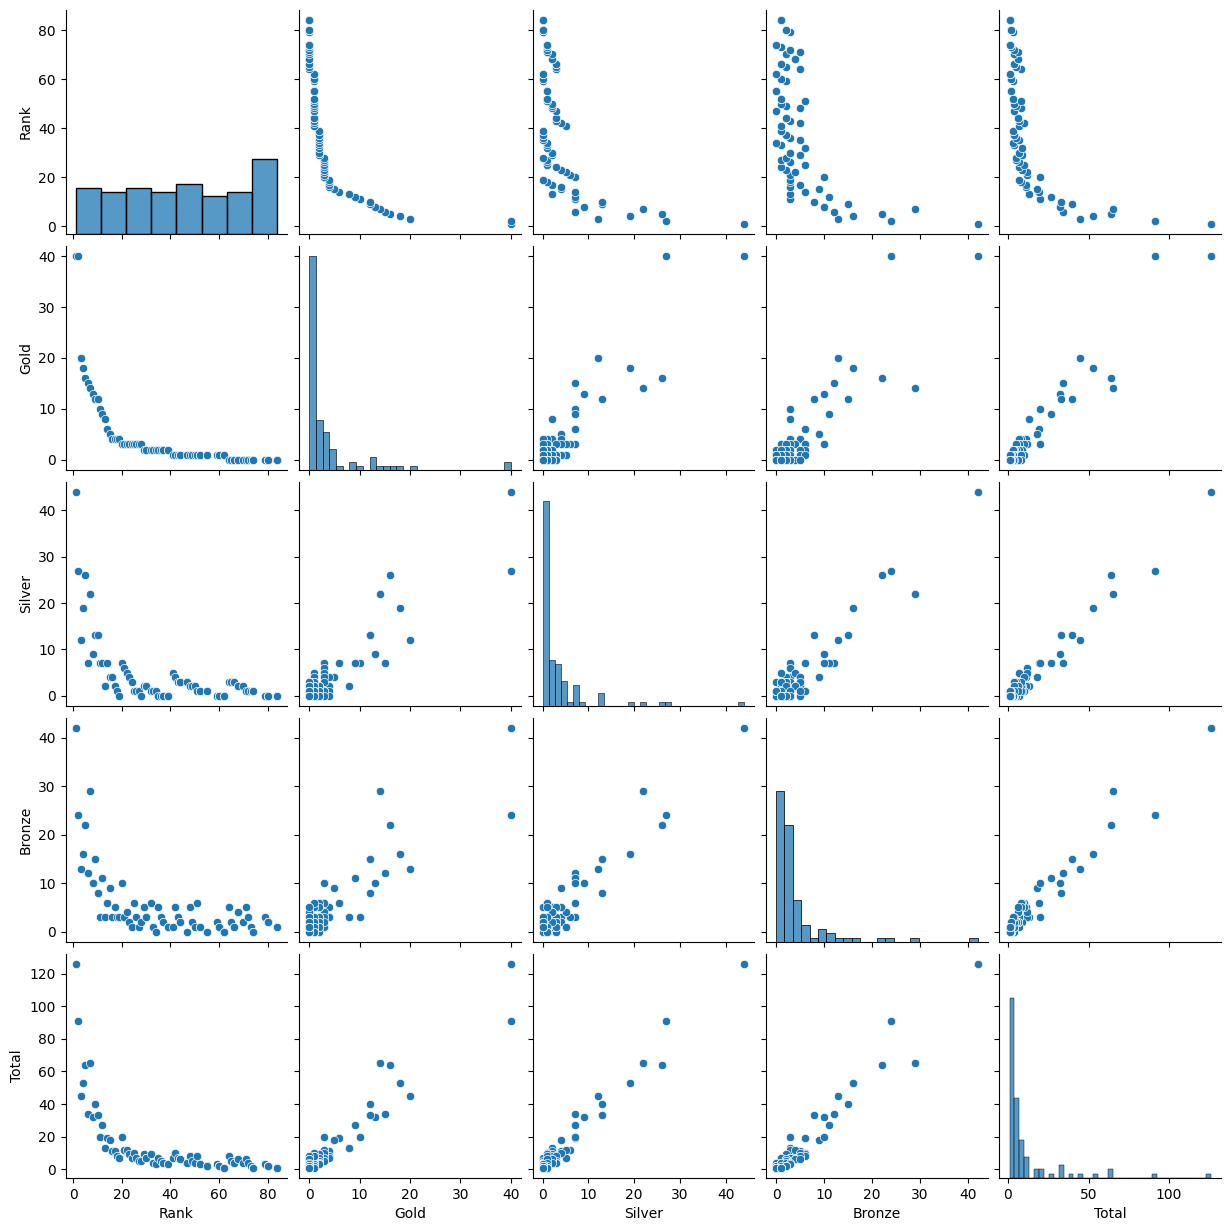

In [17]:
sns.pairplot(data)